In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
for dirpath, dirnames, filenames in os.walk("101_food/101_food"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [24]:
data_dir = pathlib.Path("101_food/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

[]


In [5]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="101_food_classes_10_percent/101_food_classes_10_percent/train/",
                        target_class="bread_pudding")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '101_food_classes_10_percent/101_food_classes_10_percent/train/bread_pudding'

In [7]:
img = view_random_image(target_dir="101_food_classes_10_percent/101_food_classes_10_percent/train/",
                        target_class="fish_and_chips")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '101_food_classes_10_percent/101_food_classes_10_percent/train/fish_and_chips'

In [8]:
img = view_random_image(target_dir="101_food_classes_10_percent/101_food_classes_10_percent/train/",
                        target_class="onion_rings")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '101_food_classes_10_percent/101_food_classes_10_percent/train/onion_rings'

In [9]:
train_datagen_norm = ImageDataGenerator(rescale = 1/255.)
test_datagen_norm = ImageDataGenerator(rescale = 1/255.)

# Setup the train and test directories
train_dir = "101_food_classes_10_percent/101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/101_food_classes_10_percent/test/"

# Import data from directories and turn it into batches
train_data_norm = train_datagen_norm.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data_norm = test_datagen_norm.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '101_food_classes_10_percent/101_food_classes_10_percent/train/'

In [10]:
tf.random.set_seed(42)
history_1_norm = model_1.fit(train_data_norm,epochs=10,validation_data=test_data_norm)

NameError: name 'model_1' is not defined

NameError: name 'history_1_norm' is not defined

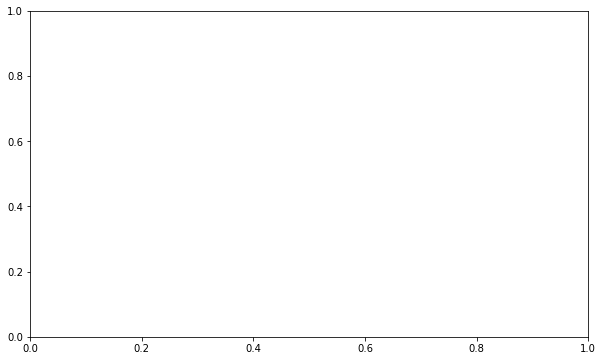

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1_norm.history['accuracy'], 'r', label='train')
ax.plot(history_1_norm.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [12]:
y_prob = model_1.predict(test_data_norm)
y_hat = y_prob.argmax(axis=1)
y_hat 

NameError: name 'model_1' is not defined

In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

In [15]:
true_y = []
for batch in range(len(test_data_norm)):
    true_y += list(test_data_norm[batch][-1].argmax(axis=1))

NameError: name 'test_data_norm' is not defined

In [16]:
pred = model_1.predict(test_data_norm).argmax(axis=1)
conf_matrix=metrics.confusion_matrix(true_y,pred)    
conf_matrix = pd.DataFrame(confusion_matrix(y_pred=pred, y_true=true_y), 
index=class_names, columns=class_names)
print("Confusion matrix:")
print(conf_matrix)

NameError: name 'model_1' is not defined